In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

class wave:
    #to create a singel peak use lambda_ == 2 * n * np.pi * sigma_, where n is an integer nad n >= 2 
    def __init__(self, V_x, lambda_, sigma_, starting_position = 300, dx_in_nm = 1):
        self.NN = V_x.size
        self.psi = np.zeros(self.NN, dtype=np.complex_)
        self.dx = dx_in_nm
        self.V = V_x
        
        normalization = 0.0
        for n in range(self.NN):
            #psi 'amplitute'
            exponent = np.exp(-1.*((n - starting_position)/sigma_)**2)
            self.psi[n] = exponent * (np.cos(2*np.pi*(n - starting_position)/lambda_) #real part
                                      + np.sin(2*np.pi*(n - starting_position)/lambda_) * 1j) #imaginary part

            normalization += (self.psi[n] * self.psi[n].conjugate()).real #real part is the only one != 0
        normalization = np.sqrt(normalization)
        for n in range(self.NN):
            self.psi[n] /= normalization
    #sum/integral of psi^* * psi
    #should be as close to 1 as possible
    def normalization_test(self):
        test_sum = 0.0
        for psi_n in self.psi:
            test_sum += (psi_n * np.conjugate(psi_n)).real
        print('c = ', test_sum)
        print('error = ', "{:e}".format((np.abs(1 - test_sum) * 100)), '%')
    
    #returns np.array of real than imaginary parts
    def split(self):
        return self.psi.real, self.psi.imag
    
    #Schrödinger hamiltonian
    #assumption:
    #space on the edges is connected (if needs changing than fix only n==0 and n == self.NN - 1 cases)
    def E_n(self, n):
        #special edge of array cases 
        if n == 0:
            return -1/(2 * self.dx**2) * (self.psi[self.NN - 1] - 2 * self.psi[0] + self.psi[1]) + self.V[0] * self.psi[0]
        if n == self.NN - 1:
            return -1/(2 * self.dx**2) * (self.psi[n-1 - 1] - 2 * self.psi[n - 1] + self.psi[0]) + self.V[n - 1] * self.psi[n - 1]
        #default option
        return -1/(2 * self.dx**2) * (self.psi[n-1] - 2 * self.psi[n] + self.psi[n+1]) + self.V[n] * self.psi[n]
    #Integral of Schrödinger hamiltonian over entire space
    def E_total(self):
        total = 0.0
        for n in range(self.NN):
            total += np.conjugate(self.psi[n]) * wave.E_n(self, n)
        return total
    
    def time_dependent_schrodinger(self):
        m = 9.1e-31
        dt = 2e-17
        dx = .1e-9
        
        psi_old = self.psi
        for n in range(self.NN):
            self.psi[n % self.NN] += 1j * ( 0.5 * sc.hbar / m * (dt / dx**2) * ((psi_old[(n-1) % self.NN] - 2 * psi_old[n % self.NN] + psi_old[(n+1) % self.NN])) - dt / sc.hbar * self.V[n % self.NN] * psi_old[n % self.NN])
    def time_steps(self, steps):
        for t in range(steps):
            self.time_dependent_schrodinger()
    
    
    
    
    #static method for creation of harmonic potentials as numpy arrays
    @staticmethod
    def harmonic_potential(m, omega, number_of_NN = 600):
        V = np.zeros(number_of_NN)
        for x in range(number_of_NN):
            V[x] = 1/2 * m * omega**2 * (x - number_of_NN/2)**2
        return V
    
    #simply plots real and imaginary parts of the function
    def plot(self):
        fig = plt.figure(figsize = (16, 8))
        ax1 = fig.add_subplot(111)
        ax1.set_xlabel('$x \, [nm]$', size = 25)
        
        xs = np.linspace(- self.dx * self.NN / 2, + self.dx * self.NN / 2, self.psi.size)
        ax1.set_xlim([xs.min(), xs.max()])
        ax1.set_ylabel('$\Psi(x)$', size = 25)
        
        real, imag = t.split()
        ax1.plot(xs, real, label = 'Real')
        ax1.plot(xs, imag, label = 'Imaginary')
        ax1.legend()
        
        ax2 = ax1.twinx()
        ax2.set_ylabel('$V(x) \, [J]$', size = 25)
        ax2.plot(xs, self.V, color = 'green')
        plt.show()
        

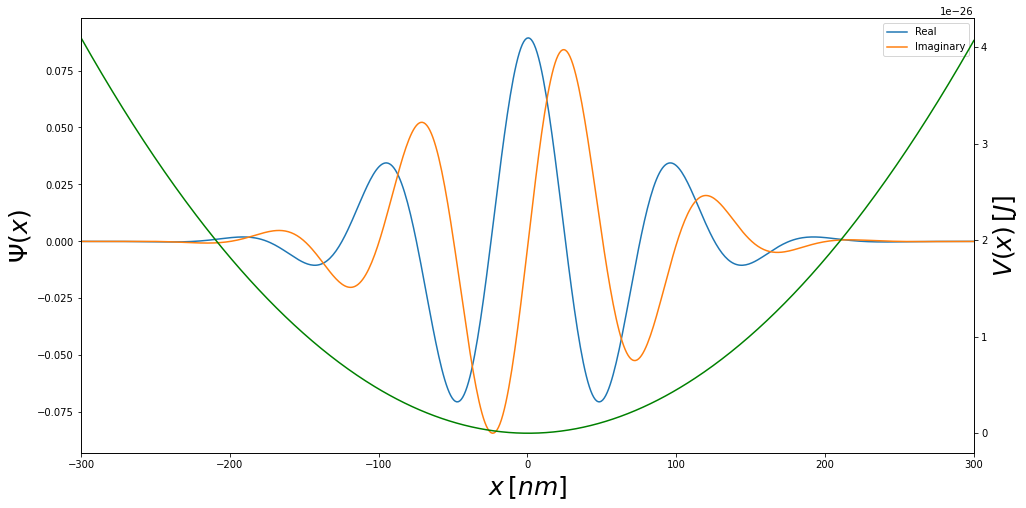

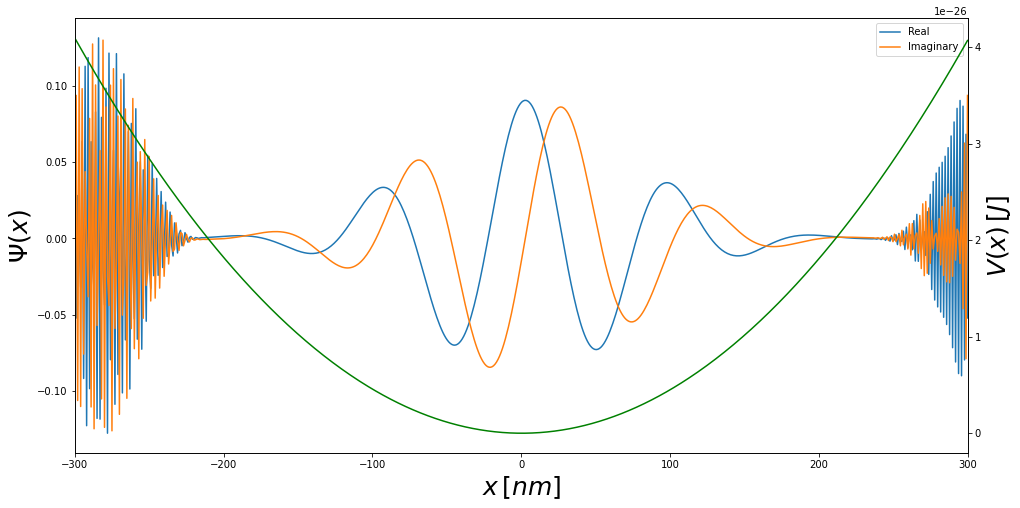

In [72]:
V_x = wave.harmonic_potential(9.1e-31, 1)
t = wave(V_x ,lambda_ = 100, sigma_ = 100)
#t.normalization_test()
#t.E_n(600)
#t.plot()
#t.E_total()
t.plot()
t.time_steps(300)
t.plot()